## Data and Libraries Setup:

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.inspection import permutation_importance
import shap

In [2]:
#import the financial distress CSV as a dataframe

df = pd.read_csv('C:/Users/Osama/Desktop/Dissertation/Data/Financial_Distress_Likelihood_Prediction_Dataset.csv')

## Dataframe Exploration:

In [3]:
#display the dataframe

display(df.sample(n=10)) 

,ID,Company Name,Year,Sector,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
2031,2032,RENEW HOLDINGS PLC.,2015,Construction,0,42.14,8,0,37,2.577000,1,63,0.012430,0.004948
48,49,AFENTRA PLC,2022,Mining & Extraction,1,48.60,8,1,40,2.095000,0,39,-0.171856,0.003724
2783,2784,ZOO DIGITAL GROUP PLC,2015,Business Services,0,53.87,8,0,18,0.497000,1,23,-0.185205,0.052477
2577,2578,TRACSIS PLC,2021,Computer Software,0,66.79,8,1,18,0.795000,0,19,0.025192,0.001048
2354,2355,SPEEDY HIRE PLC,2020,Business Services,0,28.98,8,1,44,1.459000,0,55,0.012021,0.014466
1441,1442,KIER GROUP PLC,2021,Construction,0,21.77,8,0,48,2.945000,1,31,-0.000132,0.018325
2720,2721,VP PLC,2022,Business Services,0,73.26,1,0,24,2.691000,1,73,0.024719,0.015835
1156,1157,HOWDEN JOINERY GROUP PLC,2018,Retail,0,0.00,8,1,49,4.640000,0,36,0.141156,0.002659
1258,1259,IOFINA PLC,2020,"Chemicals, Petroleum, Rubber & Plastic",0,71.64,8,0,20,0.496611,1,18,0.032078,0.041749
2030,2031,RENEW HOLDINGS PLC.,2016,Construction,0,42.14,8,0,37,3.314000,1,63,0.032047,0.003332


In [4]:
#check for missing vallues

df.isnull().sum().sum() 

0

In [5]:
#view the datatypes

print(df.dtypes)

ID                                        int64
Company Name                             object
Year                                      int64
Sector                                   object
Financial Distress                        int64
Shareholder Concentration (%)           float64
Independence Indicator                    int64
CEO Duality                               int64
Board of Directors Size                   int64
Director Remuneration (£million)        float64
Corporate Borrowing                       int64
Company Age                               int64
Retained Earnings / Total Assets (£)    float64
Interest Paid / Total Assets (£)        float64
dtype: object


In [6]:
#change 'ID' to a string

df['ID'] = df['ID'].astype(str)

print(df.dtypes)

ID                                       object
Company Name                             object
Year                                      int64
Sector                                   object
Financial Distress                        int64
Shareholder Concentration (%)           float64
Independence Indicator                    int64
CEO Duality                               int64
Board of Directors Size                   int64
Director Remuneration (£million)        float64
Corporate Borrowing                       int64
Company Age                               int64
Retained Earnings / Total Assets (£)    float64
Interest Paid / Total Assets (£)        float64
dtype: object


## Undersampling:

In [7]:
#find the count in each class in Financial Distress
class_counts = df['Financial Distress'].value_counts()
print(class_counts)

#find the class with the lesser count
min_count = class_counts.min()

#create an empty dataframe
balanced_df = pd.DataFrame()

#resample the dataset to balance classes based on Financial Distress
for value in df['Financial Distress'].unique():
    subset = df[df['Financial Distress'] == value]
    resampled_subset = subset.sample(min_count, replace=False, random_state=663442)
    balanced_df = pd.concat([balanced_df, resampled_subset.reset_index(drop=True)])

#reset the index of the dataframe and update it in place
balanced_df.reset_index(drop=True, inplace=True)

#display the dataframe
display(balanced_df.sample(10).round(4))

0    2141
1     651
Name: Financial Distress, dtype: int64


,ID,Company Name,Year,Sector,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
1172,98,ANGLO ASIAN MINING PLC,2021,Mining & Extraction,1,41.60,6,0,21,0.731,0,18,-0.0188,0.0034
529,2034,RENEWI PLC,2021,"Travel, Personal & Leisure",0,24.69,8,0,42,2.071,1,41,0.0057,0.0195
820,146,ASSOCIATED BRITISH FOODS PLC,2021,Wholesale,1,0.00,1,0,35,6.559,1,88,0.0254,0.0066
1161,1765,NICHOLS PLC,2018,Food & Tobacco Manufacturing,1,23.99,8,1,22,1.399,0,94,0.0896,0.0005
897,2572,TOWN CENTRE SECURITIES PLC,2019,Property Services,1,24.11,6,0,32,1.967,1,64,-0.0462,0.0198
907,1078,HARDIDE PLC,2017,Metals & Metal Products,1,61.23,8,1,20,0.447,0,18,-0.2887,0.0003
403,2552,THE SAGE GROUP PLC.,2015,Business Services,0,18.98,8,1,48,3.447,1,35,0.0265,0.0103
999,2669,VERTU MOTORS PLC,2018,Wholesale,1,56.00,8,1,16,1.221,1,16,0.0196,0.0020
379,1843,PAGEGROUP PLC,2020,Business Services,0,25.83,8,1,40,2.316,0,26,-0.0091,0.0033
895,1784,NORMAN BROADBENT PLC,2015,Business Services,1,76.17,8,0,47,0.714,1,86,-0.1093,0.0099


## Descriptive Statistics:

In [8]:
#display the dataframe descriptive statistics

display(balanced_df.describe().round(3))

,Year,Financial Distress,Shareholder Concentration (%),Independence Indicator,CEO Duality,Board of Directors Size,Director Remuneration (£million),Corporate Borrowing,Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
count,1302.000,1302.0,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000,1302.000
mean,2018.427,0.5,47.400,7.287,0.549,33.616,2.816,0.674,42.558,-0.057,0.015
std,2.258,0.5,23.977,1.585,0.498,14.627,4.080,0.469,32.622,0.269,0.029
min,2015.000,0.0,0.000,1.000,0.000,6.000,0.065,0.000,10.000,-3.869,0.000
25%,2016.000,0.0,27.060,8.000,0.000,23.000,0.693,0.000,20.000,-0.067,0.004
50%,2019.000,0.5,49.275,8.000,1.000,30.000,1.464,1.000,28.000,0.006,0.009
75%,2020.000,1.0,64.990,8.000,1.000,43.000,3.244,1.000,55.000,0.039,0.016
max,2022.000,1.0,97.890,8.000,1.000,91.000,53.358,1.000,139.000,1.655,0.393


In [9]:
#group the df by Financial Distress and Year and find the count
grouped_counts_df = balanced_df.groupby(['Financial Distress'])['Year'].value_counts().unstack()

#add a column for row totals
grouped_counts_df['Total'] = grouped_counts_df.sum(axis=1)

#add a row for year totals
grouped_counts_df.loc['Total'] = grouped_counts_df.sum(axis=0)

#display the count of financial distress by year
display(grouped_counts_df)

Year,2015,2016,2017,2018,2019,2020,2021,2022,Total
Financial Distress,,,,,,,,,
0,92,78,90,79,79,61,79,93,651
1,89,68,70,84,101,132,52,55,651
Total,181,146,160,163,180,193,131,148,1302


In [10]:
#group the df by Sector and Year and find the count while filling missing values with 0
grouped_counts_df = balanced_df.groupby(['Sector'])['Year'].value_counts().unstack().fillna(0)

#add a column for sector totals
grouped_counts_df['Total'] = grouped_counts_df.sum(axis=1)

#create and display a dataframe showing company count in each year and in total, sorted by the total
grouped_counts_df = pd.DataFrame(grouped_counts_df).sort_values(by='Total', ascending=False).style.format('{:.0f}')
display(grouped_counts_df)

Year,2015,2016,2017,2018,2019,2020,2021,2022,Total
Sector,,,,,,,,,
Business Services,34,33,37,35,38,43,25,35,280
Mining & Extraction,24,17,13,16,18,20,14,12,134
Construction,10,11,17,12,14,14,16,14,108
"Chemicals, Petroleum, Rubber & Plastic",14,13,9,9,14,11,7,11,88
Wholesale,9,5,15,8,9,9,6,10,71
"Industrial, Electric & Electronic Machinery",12,7,9,7,9,12,4,9,69
Computer Software,10,9,6,8,6,11,6,6,62
"Travel, Personal & Leisure",8,8,5,6,11,8,6,7,59
Retail,8,5,6,8,7,9,4,4,51


## Normality Test (Kolmogorov-Smirnov):

In [11]:
#create an empty dataframe to store the results
results = []

#iterate over each column in the dataframe
for column_name in balanced_df.columns:
    #check if the column is numeric
    if balanced_df[column_name].dtype == 'int64' or balanced_df[column_name].dtype == 'float64':
        #extract the values from the column
        column_values = balanced_df[column_name].values
        
        #conduct the Kolmogorov-Smirnov test
        ks_test = stats.kstest(column_values, 'norm')
        ks_statistic, ks_p_value = ks_test
        
        #store the results in a list
        results.append({'Column': column_name,
                        'Statistic': ks_statistic,
                        'P-value': ks_p_value})
        
#create a dataframe from the results list and display it
results_df = pd.DataFrame(results)
display(results_df.round(4))

print("\n- None of the variables are normally distributed")

,Column,Statistic,P-value
0,Year,1.0000,0.0
1,Financial Distress,0.5000,0.0
2,Shareholder Concentration (%),0.9801,0.0
3,Independence Indicator,0.9562,0.0
4,CEO Duality,0.5000,0.0
5,Board of Directors Size,1.0000,0.0
6,Director Remuneration (£million),0.5762,0.0
7,Corporate Borrowing,0.5149,0.0
8,Company Age,1.0000,0.0
9,Retained Earnings / Total Assets (£),0.4225,0.0



- None of the variables are normally distributed


## Correlation Analysis (Spearman):

In [12]:
#keep ordinal, continuous, and dependent variables only
cor_df = balanced_df.drop(['ID','Company Name','Sector','Year','CEO Duality', 'Corporate Borrowing'], axis=1)

#calculate correlation matrix (Spearman)
correlation_matrix, p_values = spearmanr(cor_df)

#convert correlation matrix to dataframe
correlation_df = pd.DataFrame(correlation_matrix, index=cor_df.columns, columns=cor_df.columns)

#convert p-values array to dataframe
p_values_df = pd.DataFrame(p_values, index=cor_df.columns, columns=cor_df.columns)

#display correlation matrix and p-values
print("Correlation Matrix:")
display(correlation_df.round(4))
print("Correlation Matrix P-Values:")
display(p_values_df.round(4))

Correlation Matrix:


,Financial Distress,Shareholder Concentration (%),Independence Indicator,Board of Directors Size,Director Remuneration (£million),Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
Financial Distress,1.0000,0.1413,-0.0640,-0.0636,-0.2534,-0.1042,-0.5183,0.1275
Shareholder Concentration (%),0.1413,1.0000,-0.3553,-0.3394,-0.5370,-0.0797,-0.1495,-0.0470
Independence Indicator,-0.0640,-0.3553,1.0000,0.1132,0.1943,0.0201,0.0391,0.0266
Board of Directors Size,-0.0636,-0.3394,0.1132,1.0000,0.6292,0.4322,0.1181,0.1784
Director Remuneration (£million),-0.2534,-0.5370,0.1943,0.6292,1.0000,0.2436,0.3422,0.0662
Company Age,-0.1042,-0.0797,0.0201,0.4322,0.2436,1.0000,0.2351,-0.0627
Retained Earnings / Total Assets (£),-0.5183,-0.1495,0.0391,0.1181,0.3422,0.2351,1.0000,-0.2195
Interest Paid / Total Assets (£),0.1275,-0.0470,0.0266,0.1784,0.0662,-0.0627,-0.2195,1.0000


Correlation Matrix P-Values:


,Financial Distress,Shareholder Concentration (%),Independence Indicator,Board of Directors Size,Director Remuneration (£million),Company Age,Retained Earnings / Total Assets (£),Interest Paid / Total Assets (£)
Financial Distress,0.0000,0.0000,0.0209,0.0216,0.0000,0.0002,0.0000,0.0000
Shareholder Concentration (%),0.0000,0.0000,0.0000,0.0000,0.0000,0.0040,0.0000,0.0903
Independence Indicator,0.0209,0.0000,0.0000,0.0000,0.0000,0.4684,0.1588,0.3373
Board of Directors Size,0.0216,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Director Remuneration (£million),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0168
Company Age,0.0002,0.0040,0.4684,0.0000,0.0000,0.0000,0.0000,0.0236
Retained Earnings / Total Assets (£),0.0000,0.0000,0.1588,0.0000,0.0000,0.0000,0.0000,0.0000
Interest Paid / Total Assets (£),0.0000,0.0903,0.3373,0.0000,0.0168,0.0236,0.0000,0.0000


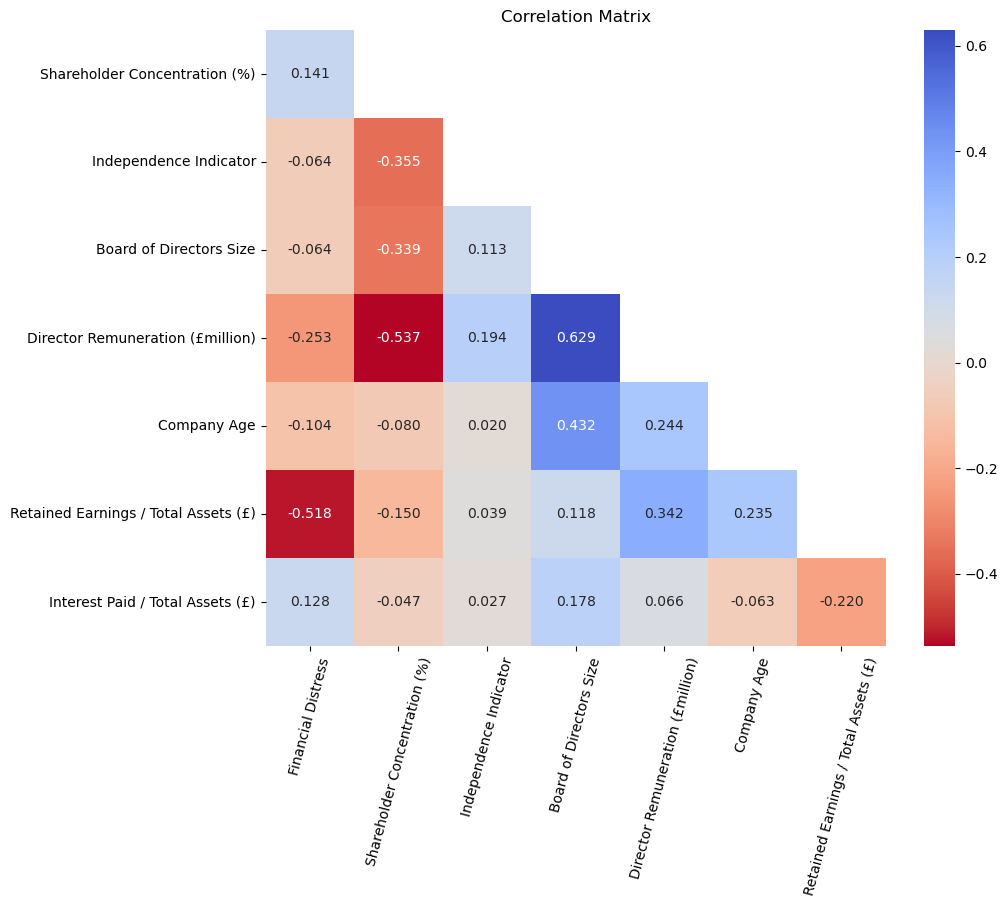

In [13]:
#calculate the correlation matrix (Spearman)
correlation_matrix = cor_df.corr(method='spearman')

#create a mask to hide the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#set the figure size
plt.figure(figsize=(10, 8))

#plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix.iloc[1:, :-1], annot=True, cmap='coolwarm_r', mask=mask[1:, :-1], fmt='.3f')
plt.xticks(rotation=75)
plt.title('Correlation Matrix')
plt.show()

## Chi-Square Tests (Pearson):

In [14]:
#create a contingency table for Financial Distress and CEO Duality
contingency_ceo = pd.crosstab(balanced_df['CEO Duality'], balanced_df['Financial Distress'])

#create a contingency table for Financial Distress and Corporate Borrowing
contingency_borrowing = pd.crosstab(balanced_df['Corporate Borrowing'], balanced_df['Financial Distress'])

#perform chi-square test for Financial Distress and CEO Duality
chi2_ceo, p_value_ceo, _, _ = chi2_contingency(contingency_ceo)

#perform chi-square test for Financial Distress and Corporate Borrowing
chi2_borrowing, p_value_borrowing, _, _ = chi2_contingency(contingency_borrowing)

#show the chi-square test and contingency table for Financial Distress and CEO Duality
p_value_ceo = round(p_value_ceo, 3)
display(contingency_ceo)
print("Chi-square value for 'Financial Distress' and 'CEO Duality':", chi2_ceo)
print("P-value for 'Financial Distress' and 'CEO Dality':", p_value_ceo)

#show the chi-square test and contingency table for Financial Distress and Corporate Borrowing
p_value_borrowing = round(p_value_borrowing, 3)
display(contingency_borrowing)
print("\nChi-square value for 'Financial Distress' and 'Corporate Borrowing':", chi2_borrowing)
print("P-value for 'Financial Distress' and 'Corporate Borrowing':", p_value_borrowing)

Financial Distress,0,1
CEO Duality,,
0,313,274
1,338,377


Chi-square value for 'Financial Distress' and 'CEO Duality': 4.479546348030164
P-value for 'Financial Distress' and 'CEO Dality': 0.034


Financial Distress,0,1
Corporate Borrowing,,
0,181,244
1,470,407



Chi-square value for 'Financial Distress' and 'Corporate Borrowing': 13.427830169696156
P-value for 'Financial Distress' and 'Corporate Borrowing': 0.0


## Pre-processing for Machine Learning:

In [15]:
#remove 'ID', 'Sector','Company Name', and 'year' columns
df_ml = balanced_df.drop(['ID', 'Sector', 'Company Name', 'Year'], axis=1)

#find how many rows are left in the dataframe 
print(df_ml.shape)

#separate the features and target variable
X = df_ml.drop('Financial Distress', axis=1)
y = df_ml['Financial Distress']

#perform train-test split with stratified sampling and 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=976666, stratify=y)

#perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1302, 10)


## Association Test with the Dependent Variable:

Optimization terminated successfully.
         Current function value: 0.551631
         Iterations 8


,Variable,Coefficient,P-value
0,Constant,0.3166,0.0002
1,Shareholder Concentration (%),0.1090,0.2060
2,Independence Indicator,-0.1620,0.0350
3,CEO Duality,0.1563,0.0380
4,Board of Directors Size,0.2505,0.0100
5,Director Remuneration (£million),-0.3028,0.0080
6,Corporate Borrowing,-0.1023,0.1860
7,Company Age,-0.0138,0.8530
8,Retained Earnings / Total Assets (£),-2.7711,0.0000
9,Interest Paid / Total Assets (£),-0.2156,0.1310


                           Logit Regression Results                           
Dep. Variable:     Financial Distress   No. Observations:                 1041
Model:                          Logit   Df Residuals:                     1031
Method:                           MLE   Df Model:                            9
Date:                Wed, 05 Jul 2023   Pseudo R-squ.:                  0.2042
Time:                        09:25:41   Log-Likelihood:                -574.25
converged:                       True   LL-Null:                       -721.57
Covariance Type:            nonrobust   LLR p-value:                 3.582e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3166      0.086      3.670      0.000       0.148       0.486
x1             0.1090      0.086      1.264      0.206      -0.060       0.278
x2            -0.1620      0.077     -2.108      0.0

,Variable,Odds Ratio,Odds Ratio P-value,95% CI Lower,95% CI Upper
1,Shareholder Concentration (%),1.1151,0.206,0.9418,1.3203
2,Independence Indicator,0.8505,0.035,0.7316,0.9887
3,CEO Duality,1.1692,0.038,1.0084,1.3556
4,Board of Directors Size,1.2846,0.010,1.0629,1.5526
5,Director Remuneration (£million),0.7387,0.008,0.5904,0.9243
6,Corporate Borrowing,0.9027,0.186,0.7756,1.0507
7,Company Age,0.9863,0.853,0.8523,1.1414
8,Retained Earnings / Total Assets (£),0.0626,0.000,0.0368,0.1066
9,Interest Paid / Total Assets (£),0.8061,0.131,0.6091,1.0666


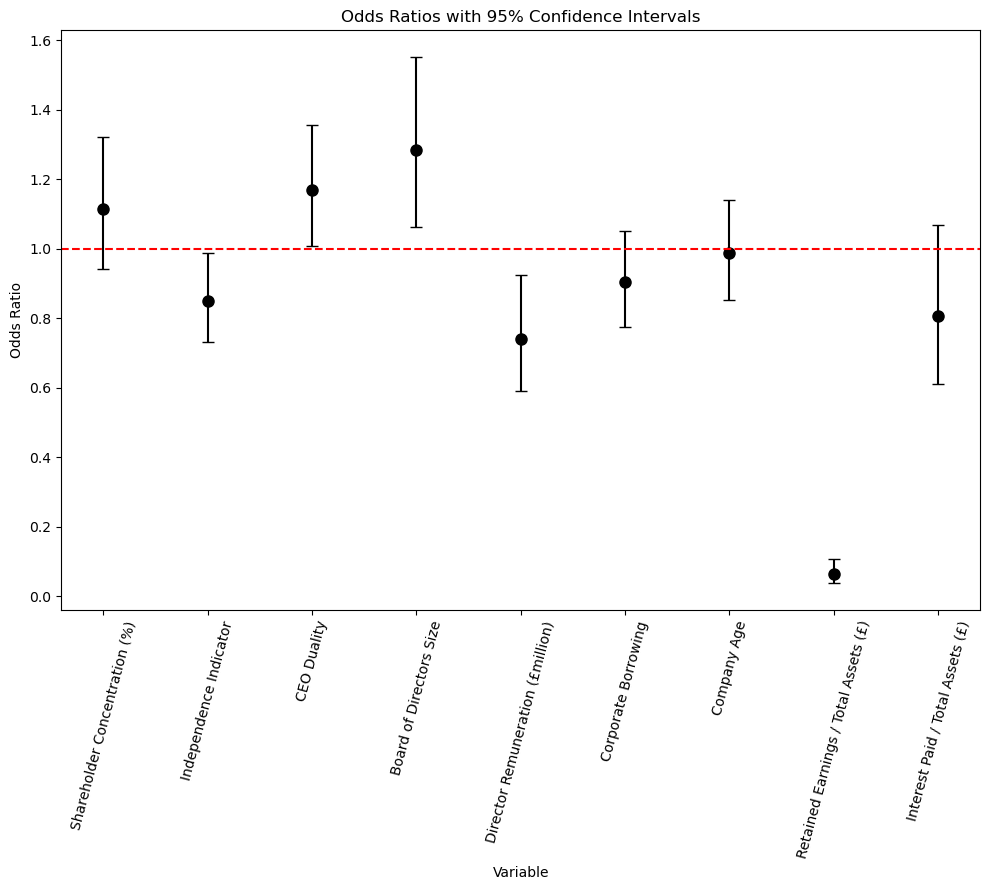

In [16]:
##Logit Regression Association Test


#fit logistic regression with statsmodels to get p-values and coefficients
logit_sm = sm.Logit(y_train, sm.add_constant(X_train_scaled)).fit()

#calculate odds ratios and confidence intervals
p_values = logit_sm.pvalues
r_squared = logit_sm.prsquared

#create a dataframe to store the results
results = pd.DataFrame({
    'Variable': ['Constant'] + X_train.columns.tolist(),
    'Coefficient': [logit_sm.params[0]] + logit_sm.params[1:].tolist(),
    'P-value': [p_values[0]] + p_values[1:].round(3).tolist()
})

#print the results table
display(results.round(4))

print(logit_sm.summary())

##Odds Ratio


#calculate odds ratios and confidence intervals, and exclude the constant term p-value
odds_ratios = np.exp(logit_sm.params)
odds_ratio_p_values = logit_sm.pvalues.drop('const')
ci_lower = np.exp(logit_sm.conf_int(0.05)[0])
ci_upper = np.exp(logit_sm.conf_int(0.05)[1])

odds= pd.DataFrame({
    'Variable': ['Constant'] + X_train.columns.tolist(),
    'Odds Ratio': [odds_ratios[0]] + odds_ratios[1:].tolist(),
    'Odds Ratio P-value': [np.nan] + odds_ratio_p_values.round(3).tolist(),
    '95% CI Lower': [ci_lower[0]] + ci_lower[1:].tolist(),
    '95% CI Upper': [ci_upper[0]] + ci_upper[1:].tolist()
})

print("\nOdds Ratio:")
display(odds[1:].round(4))

#exclude the constant from visualization
odds_subset = odds[1:]

#set the variables for visualization
variables = odds_subset['Variable']
odds_ratio = odds_subset['Odds Ratio']
ci_lower = odds_subset['95% CI Lower']
ci_upper = odds_subset['95% CI Upper']

#set the figure size
plt.figure(figsize=(10, 9))

#set the positions of the variables on the x-axis
x_pos = np.arange(len(variables))

#plot the odds ratio with confidence intervals as box plots
plt.plot(x_pos, odds_ratio, 'ko', markersize=8)
plt.errorbar(x_pos, odds_ratio, yerr=[odds_ratio - ci_lower, ci_upper - odds_ratio],fmt='none', capsize=4, color='k')

#set the x-axis labels
plt.xticks(x_pos, variables, rotation=75)

#name the axes and title
plt.xlabel('Variable')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios with 95% Confidence Intervals')

#add a dashed line on the odd value (1) to detrmine insignificant varaibles
plt.axhline(y=1, color='r', linestyle='--')

#display the plot
plt.tight_layout()
plt.show()


## Hyperparameter Optimised Prediction Models:

1- Logistic Regression:

In [17]:
##Logistic Regression Tuned Model for Prediction


#define the logistic regression model
logreg = LogisticRegression()

#define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_logreg = grid_search.best_estimator_
print("Best Model Parameters:", best_model_logreg)

#perform cross-validation with the best model
cross_val_scores_logreg = cross_val_score(best_model_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_logreg.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("\nLogistic Regression:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_logreg.mean().round(4))
print("Test Set Accuracy:", accuracy_logreg.round(4))
print("Precision:", precision_logreg.round(4))
print("Recall:", recall_logreg.round(4))
print("F1 Score:", f1_logreg.round(4))
print("ROC AUC Score:", roc_auc_logreg.round(4))
print("\n\n")

Best Model Parameters: LogisticRegression(C=1)

Logistic Regression:

Cross-Validation Mean Accuracy: 0.7358
Test Set Accuracy: 0.7318
Precision: 0.7699
Recall: 0.6641
F1 Score: 0.7131
ROC AUC Score: 0.7321





 2- Decision Trees:

In [18]:
##Decision Trees Tuned Model for Prediction


#define the Decision Trees model
dt_model = DecisionTreeClassifier()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5]
}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_dt = grid_search.best_estimator_
print("Best Model Parameters:", best_model_dt)

#perform cross-validation with the best model
cross_val_scores_dt = cross_val_score(best_model_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_dt.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("\nDecision Trees:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_dt.mean().round(4))
print("Test Set Accuracy:", accuracy_dt.round(4))
print("Precision:", precision_dt.round(4))
print("Recall:", recall_dt.round(4))
print("F1 Score:", f1_dt.round(4))
print("ROC AUC Score:", roc_auc_dt.round(4))
print("\n\n")

Best Model Parameters: DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=5)

Decision Trees:

Cross-Validation Mean Accuracy: 0.6648
Test Set Accuracy: 0.7395
Precision: 0.7333
Recall: 0.7557
F1 Score: 0.7444
ROC AUC Score: 0.7394





3- Random Forests:

In [29]:
##Random Forests Tuned Model for Prediction


#define the Random Forest model
random_forest = RandomForestClassifier()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [7, 10],
    'min_samples_split': [5, 10]
}

#perform hyperparameter optimization using the parameter grid
grid_search = GridSearchCV(random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_rf = grid_search.best_estimator_
print("Best Model Parameters:", best_model_rf)

#perform cross-validation with the best model
cross_val_scores_rf = cross_val_score(best_model_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

#predict the target variable for the test set
y_pred = best_model_rf.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("\nRandom Forests:\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_rf.mean().round(4))
print("Test Set Accuracy:", accuracy_rf.round(4))
print("Precision:", precision_rf.round(4))
print("Recall:", recall_rf.round(4))
print("F1 Score:", f1_rf.round(4))
print("ROC AUC Score:", roc_auc_rf.round(4))
print("\n\n")

Best Model Parameters: RandomForestClassifier(max_depth=7, min_samples_split=5)

Random Forests:

Cross-Validation Mean Accuracy: 0.7291
Test Set Accuracy: 0.7701
Precision: 0.784
Recall: 0.7481
F1 Score: 0.7656
ROC AUC Score: 0.7702





4- Artificial Neural Networks (Multi-Layer Perceptron):

In [52]:
##Artificial Neural Networks (Multi-Layer Perceptron) Tuned Model for Prediction


#define the Artificial Neural Networks (Multi-Layer Perceptron) model
ann_model = MLPClassifier()

#define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (20,)],
    'activation': ['relu', 'tanh'],
    'alpha': [(0.1), (0.01)]
}

#perform hyperparameter optimization using the parameter grid
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search = GridSearchCV(ann_model, param_grid=param_grid, cv=5, scoring='accuracy') 
    grid_search.fit(X_train_scaled, y_train)

#find the best model
best_model_ann = grid_search.best_estimator_
print("Best Model Parameters:", best_model_ann)

#perform cross-validation with the best model
cross_val_scores_ann = cross_val_score(best_model_ann, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

#predict the target variable for the test set
y_pred = best_model_ann.predict(X_test_scaled)

#calculate evaluation metrics for the test set
accuracy_ann = accuracy_score(y_test, y_pred)
precision_ann = precision_score(y_test, y_pred)
recall_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)
roc_auc_ann = roc_auc_score(y_test, y_pred)

#print the evaluation metrics
print("\nArtificial Neural Networks (Multi-Layer Perceptron):\n")
print("Cross-Validation Mean Accuracy:", cross_val_scores_ann.mean().round(4))
print("Test Set Accuracy:", accuracy_ann.round(4))
print("Precision:", precision_ann.round(4))
print("Recall:", recall_ann.round(4))
print("F1 Score:", f1_ann.round(4))
print("ROC AUC Score:", roc_auc_ann.round(4))

Best Model Parameters: MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(20,))

Artificial Neural Networks (Multi-Layer Perceptron):

Cross-Validation Mean Accuracy: 0.7243
Test Set Accuracy: 0.7548
Precision: 0.7965
Recall: 0.687
F1 Score: 0.7377
ROC AUC Score: 0.755


## Overall Models Evaluation Metrics:

In [53]:
#create a data dictionary
data = {
    'Model': [
    'Logistic Regression', 
    'Decision Trees', 
    'Random Forests', 
    'Artificial Neural Networks'
    ],
    'Accuracy': [
        f"{accuracy_logreg*100:.2f}%",
        f"{accuracy_dt*100:.2f}%",
        f"{accuracy_rf*100:.2f}%",
        f"{accuracy_ann*100:.2f}%"
    ],
    'Precision': [
        f"{precision_logreg*100:.2f}%",
        f"{precision_dt*100:.2f}%",
        f"{precision_rf*100:.2f}%",
        f"{precision_ann*100:.2f}%"
    ],
    'Recall': [
        f"{recall_logreg*100:.2f}%",
        f"{recall_dt*100:.2f}%",
        f"{recall_rf*100:.2f}%",
        f"{recall_ann*100:.2f}%"
    ],
    'F1 Score': [
        f"{f1_logreg*100:.2f}%",
        f"{f1_dt*100:.2f}%",
        f"{f1_rf*100:.2f}%",
        f"{f1_ann*100:.2f}%"
    ],
    'ROC AUC Score': [
        f"{roc_auc_logreg*100:.2f}%",
        f"{roc_auc_dt*100:.2f}%",
        f"{roc_auc_rf*100:.2f}%",
        f"{roc_auc_ann*100:.2f}%"
    ]
}


#create a dataframe from the dictionary
evaluation_metrics = pd.DataFrame(data)

#display the dataframe
display(evaluation_metrics)


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,73.18%,76.99%,66.41%,71.31%,73.21%
1,Decision Trees,73.95%,73.33%,75.57%,74.44%,73.94%
2,Random Forests,77.01%,78.40%,74.81%,76.56%,77.02%
3,Artificial Neural Networks,75.48%,79.65%,68.70%,73.77%,75.50%


## Feature Importances (Permutation Importance):

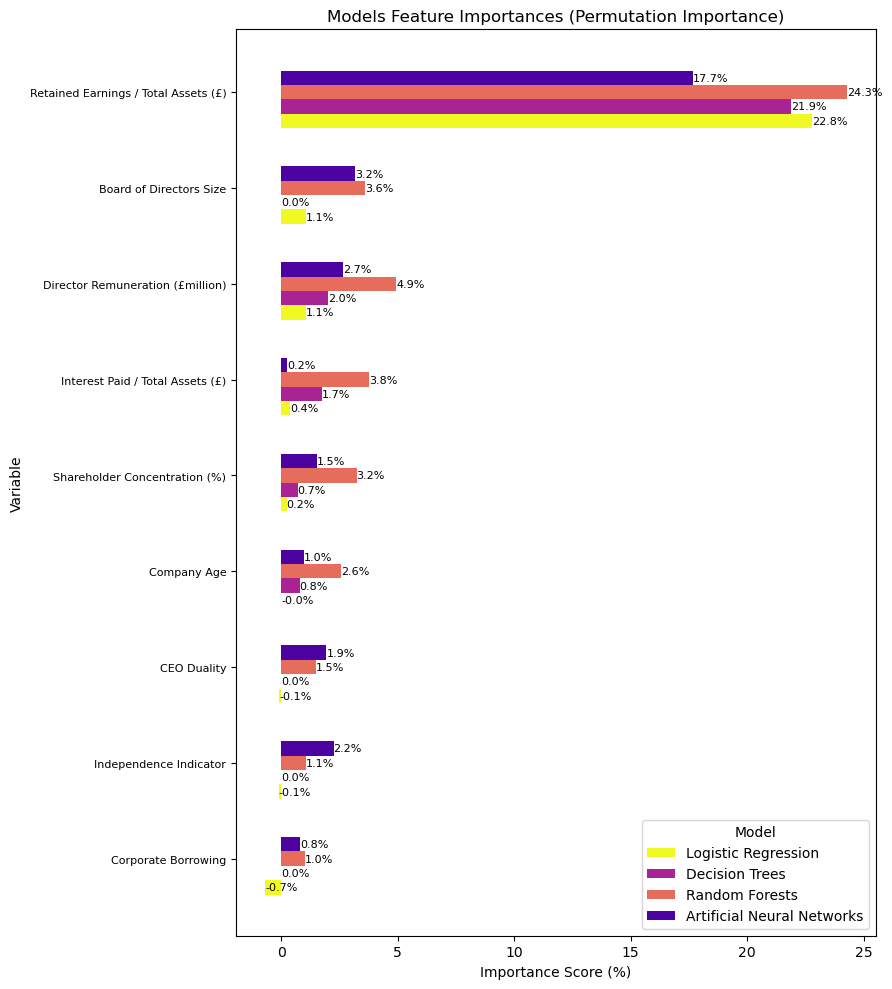

In [22]:
##Feature Importances (Permutation Importance) Setup


#get the feature importances (permutation importance) - Logistic Regression
importance_scores_logreg = permutation_importance(best_model_logreg, X_test_scaled, y_test, n_repeats=10, random_state=420)
importance_scores_logreg_mean = importance_scores_logreg.importances_mean*100

#get the feature importances (permutation importance) - Decision Trees
importance_scores_dt = permutation_importance(best_model_dt, X_train_scaled, y_train, n_repeats=10, random_state=420)
importance_scores_dt_mean = importance_scores_dt.importances_mean*100

#get the feature importances (permutation importance) - Random Forests
importance_scores_rf = permutation_importance(best_model_rf, X_train_scaled, y_train, n_repeats=10, random_state=420)
importance_scores_rf_mean = importance_scores_rf.importances_mean*100

#get the feature importances (permutation importance) - Artificial Neural Networks
importance_scores_ann = permutation_importance(best_model_ann, X_train_scaled, y_train, n_repeats=10, random_state=420)
importance_scores_ann_mean = importance_scores_ann.importances_mean*100

#get the feature names from the input data
feature_names = X_train.columns.tolist()

#srt the feature importances in ascending order
sorted_indices = np.argsort(importance_scores_logreg_mean)
importance_scores_logreg_mean_sorted = importance_scores_logreg_mean[sorted_indices]
importance_scores_dt_mean_sorted = importance_scores_dt_mean[sorted_indices]
importance_scores_rf_mean_sorted = importance_scores_rf_mean[sorted_indices]
importance_scores_ann_mean_sorted = importance_scores_ann_mean[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]


##Side-by-Side Bar Plot


#set the width of the bars
bar_width = 0.15

#set the positions of the bars on the x-axis
bar1 = np.arange(len(feature_names))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]
bar4 = [x + bar_width for x in bar3]

#generate colors from 'plasma' color scheme
colors = cm.plasma(np.linspace(0, 1, len(feature_names)))

#define the figure size
plt.figure(figsize=(9, 10))

#plot the feature importances bars
plt.barh(bar1, importance_scores_logreg_mean_sorted, color=colors[8], height=bar_width, label='Logistic Regression')
plt.barh(bar2, importance_scores_dt_mean_sorted, color=colors[3], height=bar_width, label='Decision Trees')
plt.barh(bar3, importance_scores_rf_mean_sorted, color=colors[5], height=bar_width, label='Random Forests')
plt.barh(bar4, importance_scores_ann_mean_sorted, color=colors[1], height=bar_width, label='Artificial Neural Networks')

#add yticks and labels
plt.ylabel('Variable', fontsize=10)
plt.xlabel('Importance Score (%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(np.arange(len(feature_names)) + 2 * bar_width, sorted_feature_names, fontsize=8, rotation=0)
plt.title('Models Feature Importances (Permutation Importance)', fontsize=12)
plt.legend(title='Model',fontsize=10)

#add labels on the right of each bar
for i, score in enumerate(importance_scores_logreg_mean_sorted):
    plt.text(score, bar1[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)  
for i, score in enumerate(importance_scores_dt_mean_sorted):
    plt.text(score, bar2[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)
for i, score in enumerate(importance_scores_rf_mean_sorted):
    plt.text(score, bar3[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8)  
for i, score in enumerate(importance_scores_ann_mean_sorted):
    plt.text(score, bar4[i], f'{score:.1f}%', ha='left', va='center', color='black', fontsize=8) 

#show the plot
plt.tight_layout()
plt.show()

## Features' Models' Impact (SHAP):

1- Logistic Regression:

  0%|          | 0/261 [00:00<?, ?it/s]

SHAP Impact on Model Plot:


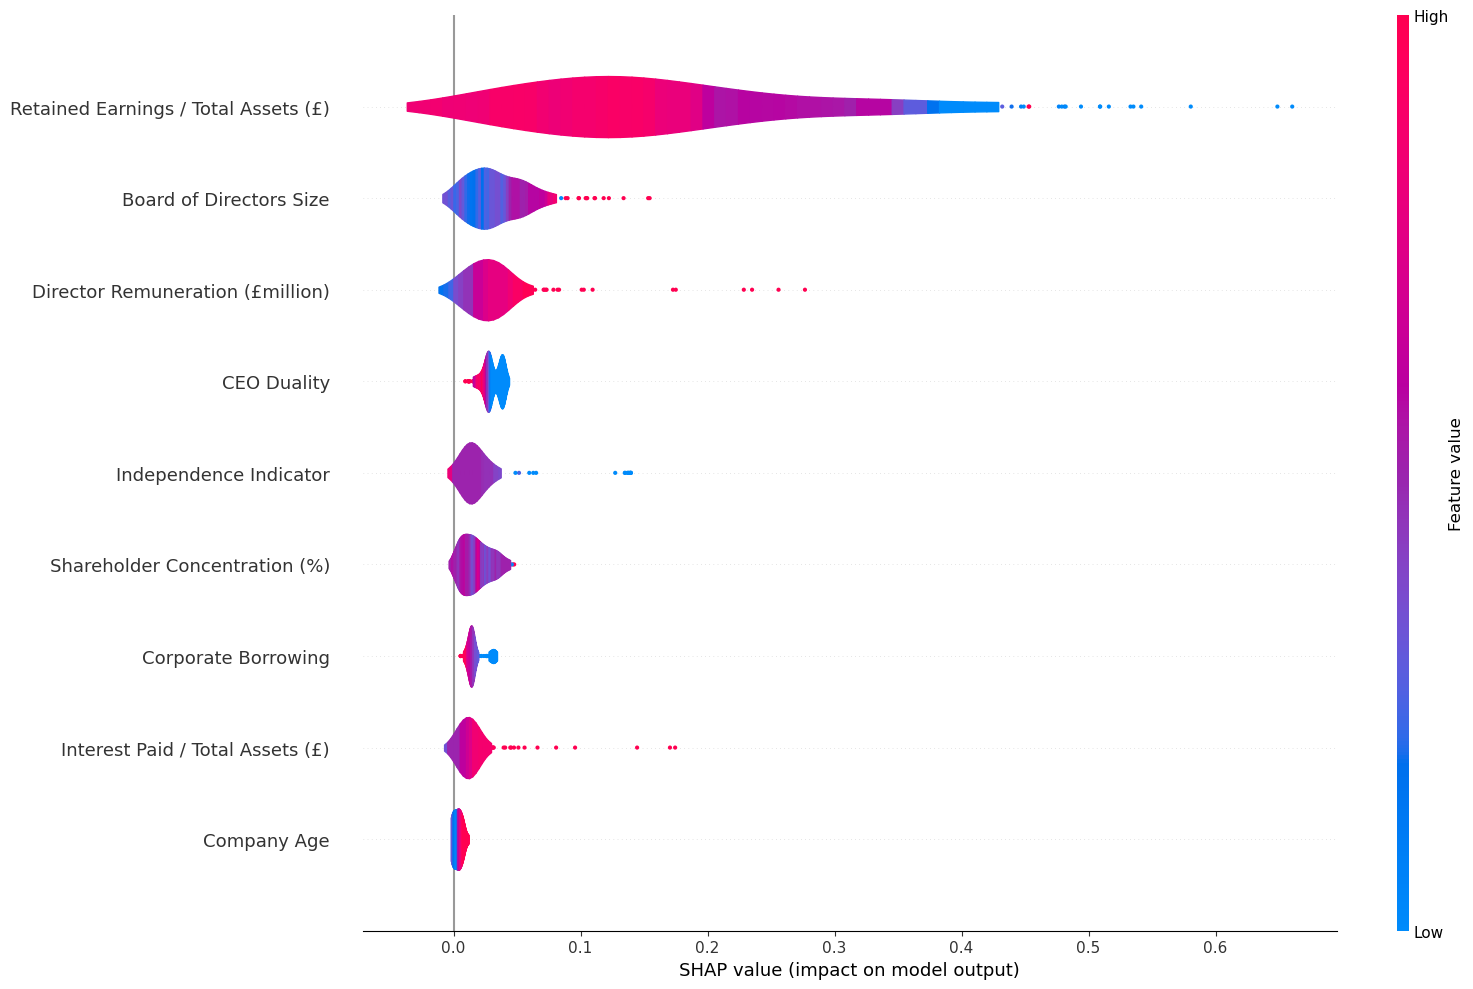

SHAP Force Plot:


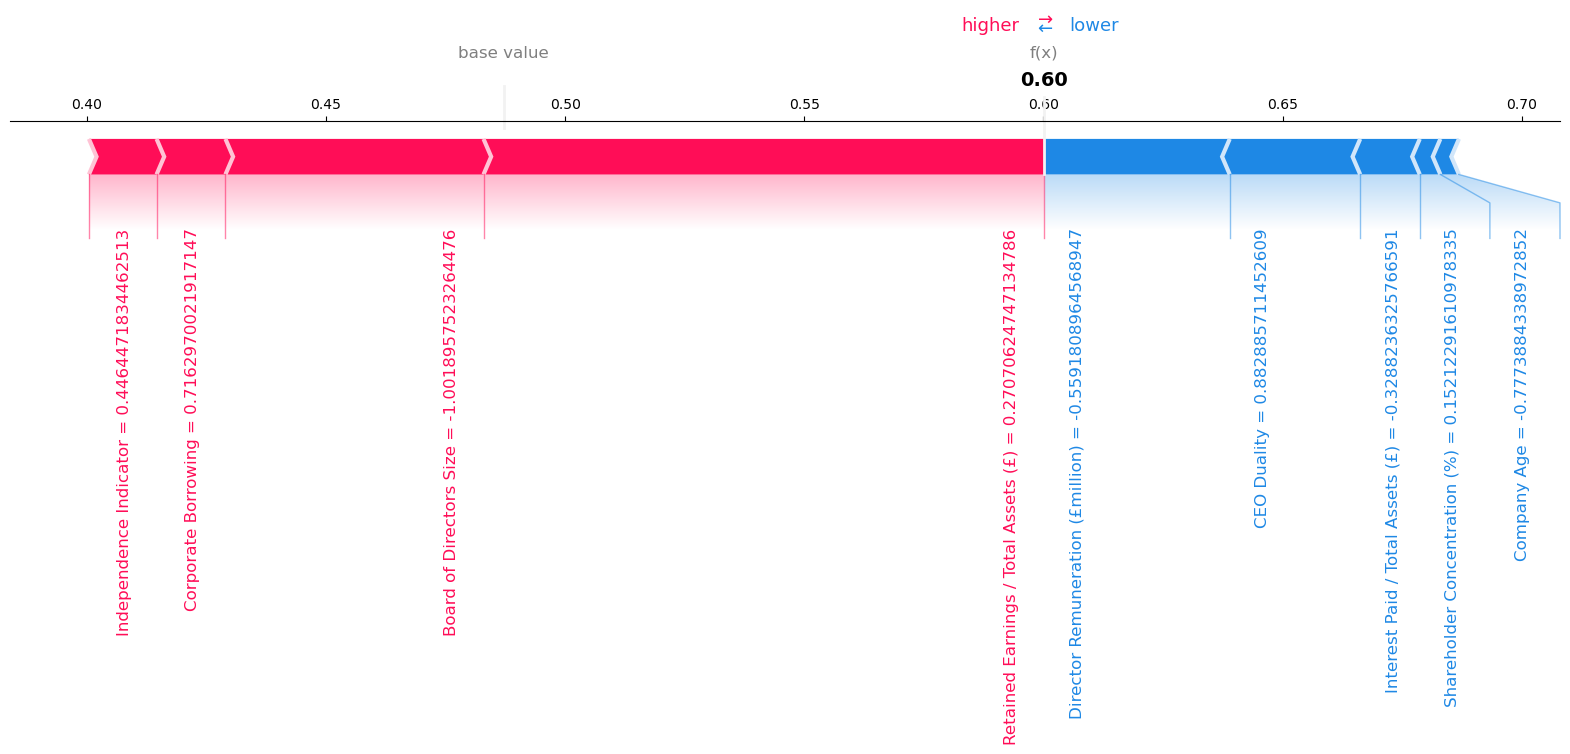

In [23]:
shap.initjs()

#create a lambda function rturning probabilities
model_fn = lambda x: best_model_logreg.predict_proba(x)

#create a background dataset for the explainer
background_data = shap.sample(X_train_scaled, 100)

#initialize the SHAP explainer with the trained model
explainer = shap.KernelExplainer(model_fn, background_data)

#gnerate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

print("SHAP Impact on Model Plot:")

#visualize the SHAP values
feature_names = X_train.columns.tolist()
shap_values_abs = np.abs(shap_values)
shap.summary_plot(shap_values_abs[0],
                  X_test_scaled,
                  feature_names=feature_names,
                  plot_type="violin",
                  plot_size=(16,10))

print("SHAP Force Plot:")

#explain the prediction for the selected instance
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0],
                X_test_scaled[0],
                feature_names=feature_names,
                matplotlib=True,
                text_rotation=90,
                contribution_threshold=0.0001)

2- Decision Trees:

SHAP Impact on Model Plot:


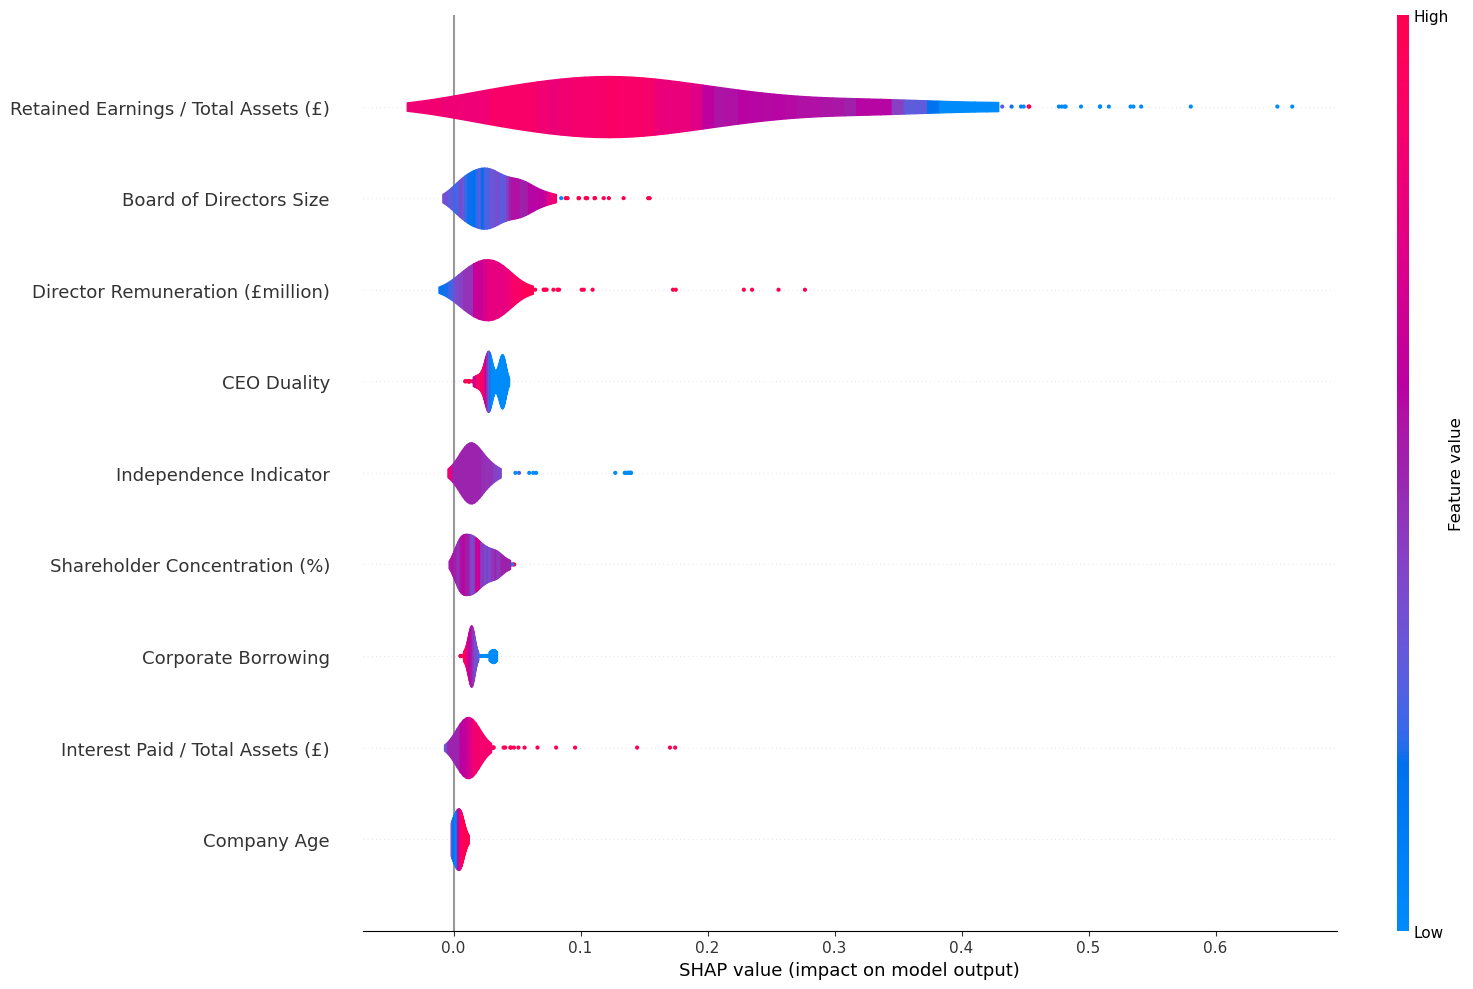

SHAP Force Plot:


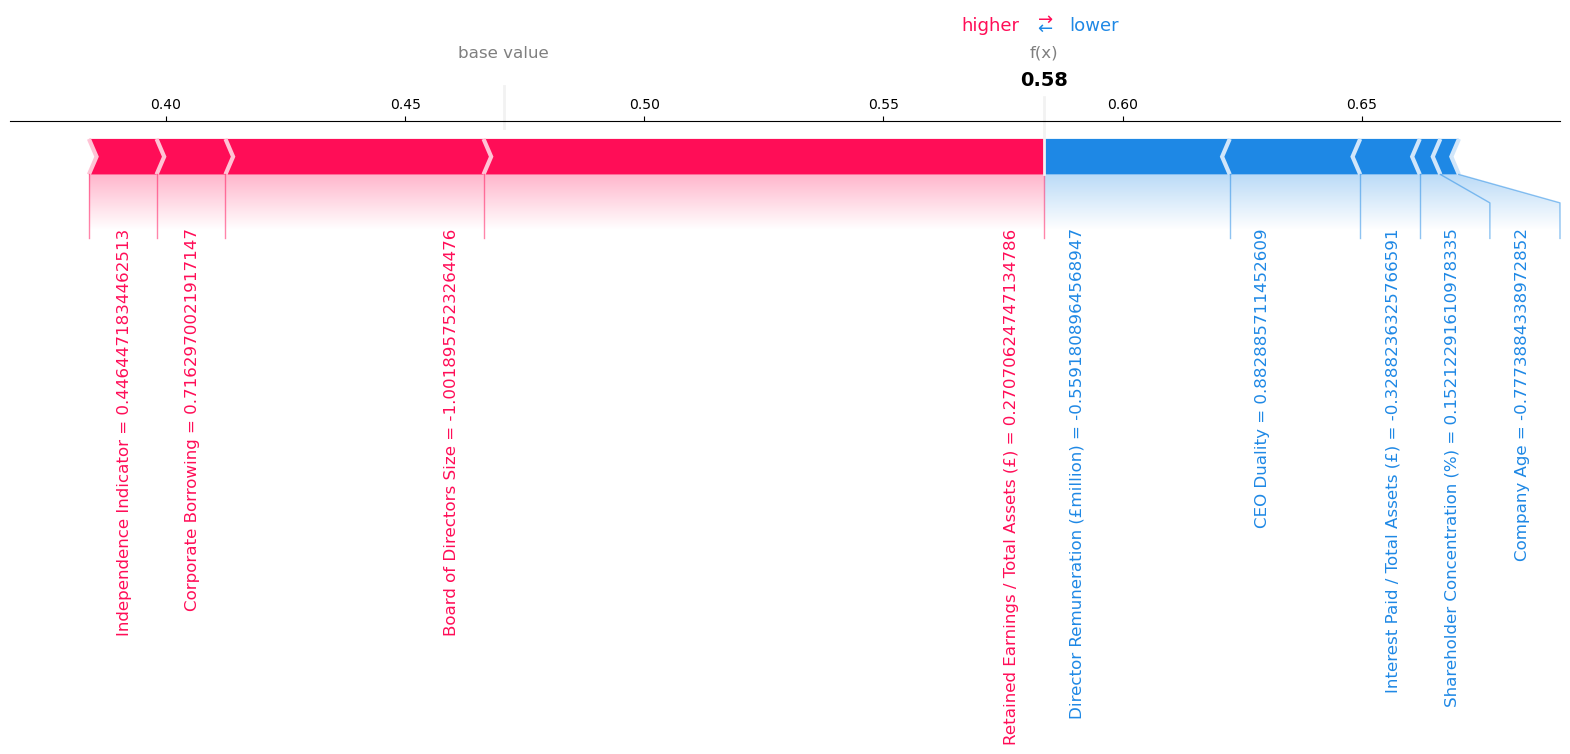

In [25]:
#create a lambda function rturning probabilities
model_fn = lambda x: best_model_dt.predict_proba(x)

#create a background dataset for the explainer
background_data = shap.sample(X_train_scaled, 100)

#initialize the SHAP explainer with the trained model
explainer = shap.KernelExplainer(model_fn, background_data)

print("SHAP Impact on Model Plot:")

#visualize the SHAP values
feature_names = X_train.columns.tolist()
shap_values_abs = np.abs(shap_values)
shap.summary_plot(shap_values_abs[0],
                  X_test_scaled,
                  feature_names=feature_names,
                  plot_type="violin",
                  plot_size=(16,10))

print("SHAP Force Plot:")

#explain the prediction for the selected instance
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0],
                X_test_scaled[0],
                feature_names=feature_names,
                matplotlib=True,
                text_rotation=90,
                contribution_threshold=0.0001)

 3- Random Forrests:

  0%|          | 0/261 [00:00<?, ?it/s]

SHAP Impact on Model Plot:


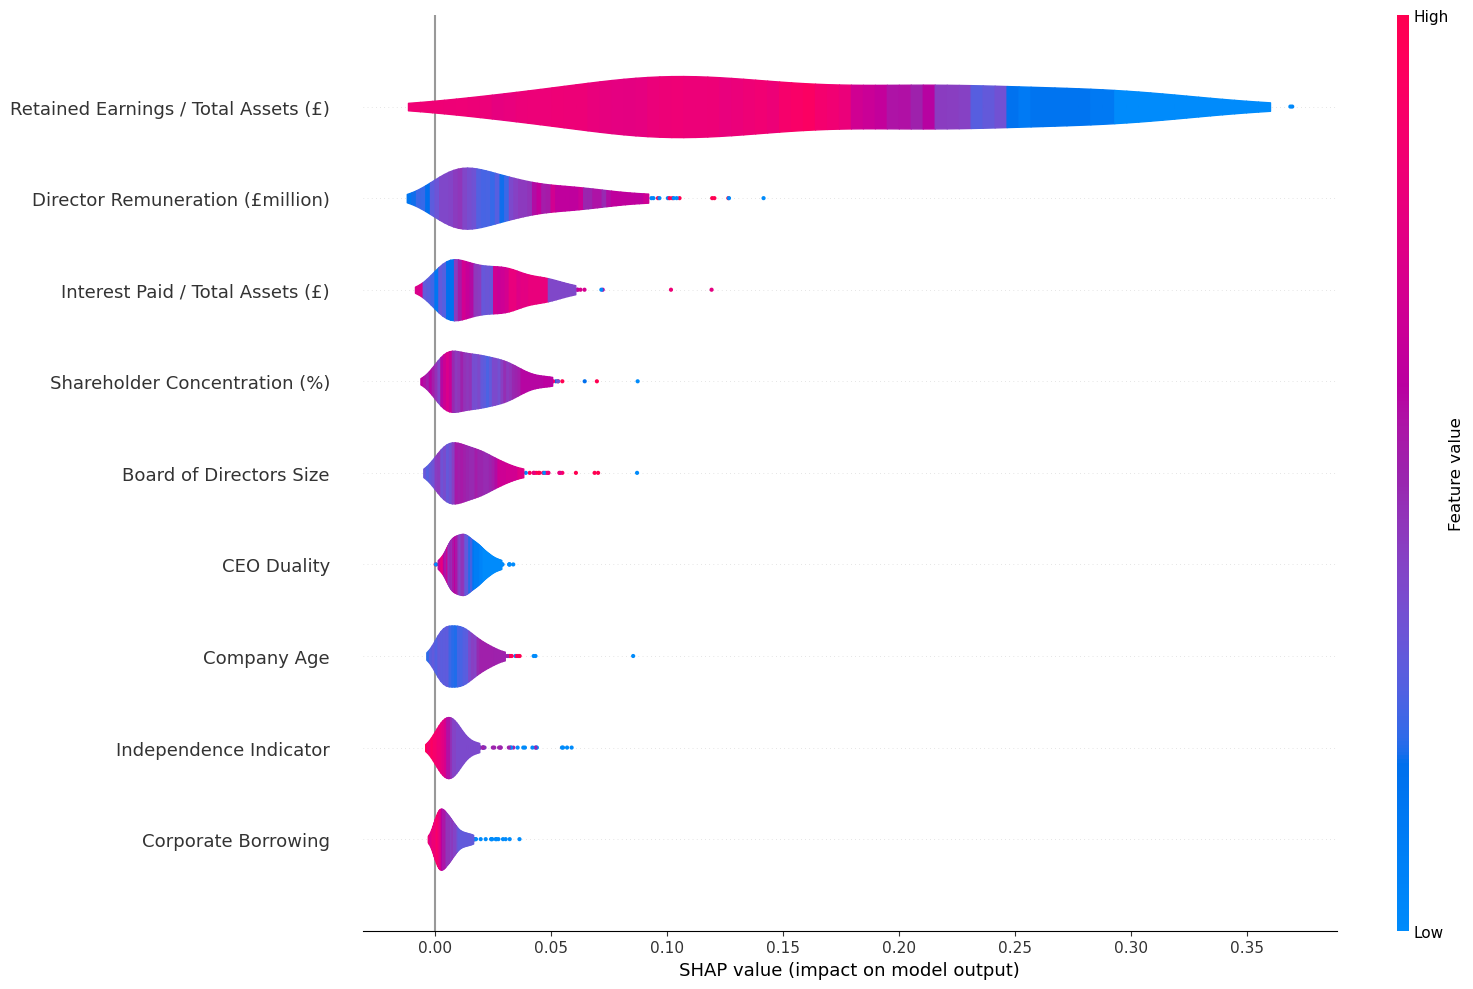

SHAP Force Plot:


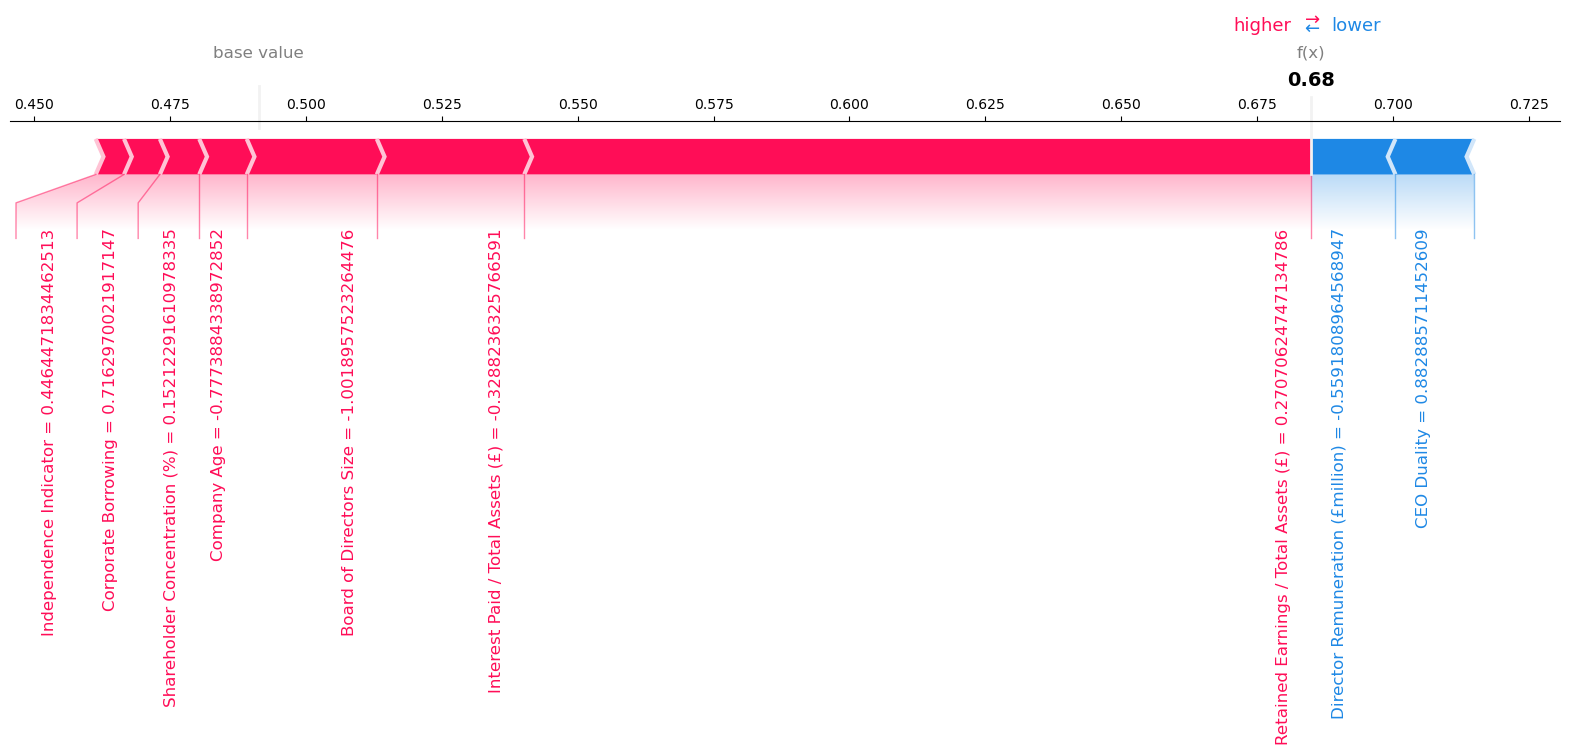

In [54]:
#create a lambda function rturning probabilities
model_fn = lambda x: best_model_rf.predict_proba(x)

#create a background dataset for the explainer
background_data = shap.sample(X_train_scaled, 100)

#initialize the SHAP explainer with the trained model
explainer = shap.KernelExplainer(model_fn, background_data)

#gnerate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

print("SHAP Impact on Model Plot:")

#visualize the SHAP values
feature_names = X_train.columns.tolist()
shap_values_abs = np.abs(shap_values)
shap.summary_plot(shap_values_abs[0],
                  X_test_scaled,
                  feature_names=feature_names,
                  plot_type="violin",
                  plot_size=(16,10))

print("SHAP Force Plot:")

#explain the prediction for the selected instance
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0],
                X_test_scaled[0],
                feature_names=feature_names,
                matplotlib=True,
                text_rotation=90,
                contribution_threshold=0.0001)

4- Artificial Neural Networks:

  0%|          | 0/261 [00:00<?, ?it/s]

SHAP Impact on Model Plot:


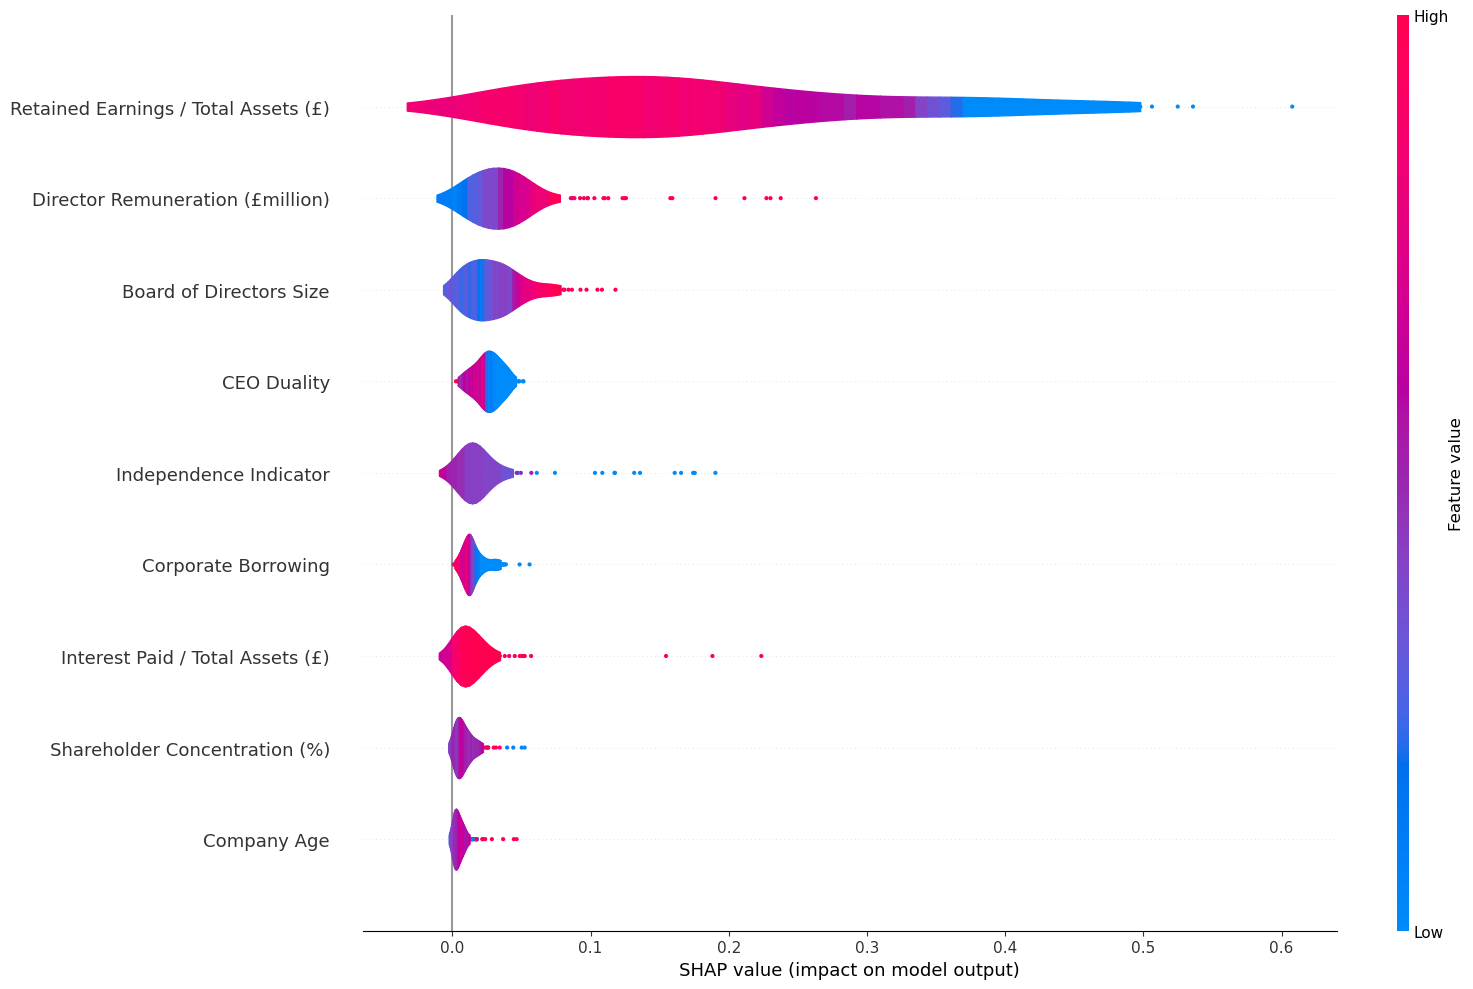

SHAP Force Plot:


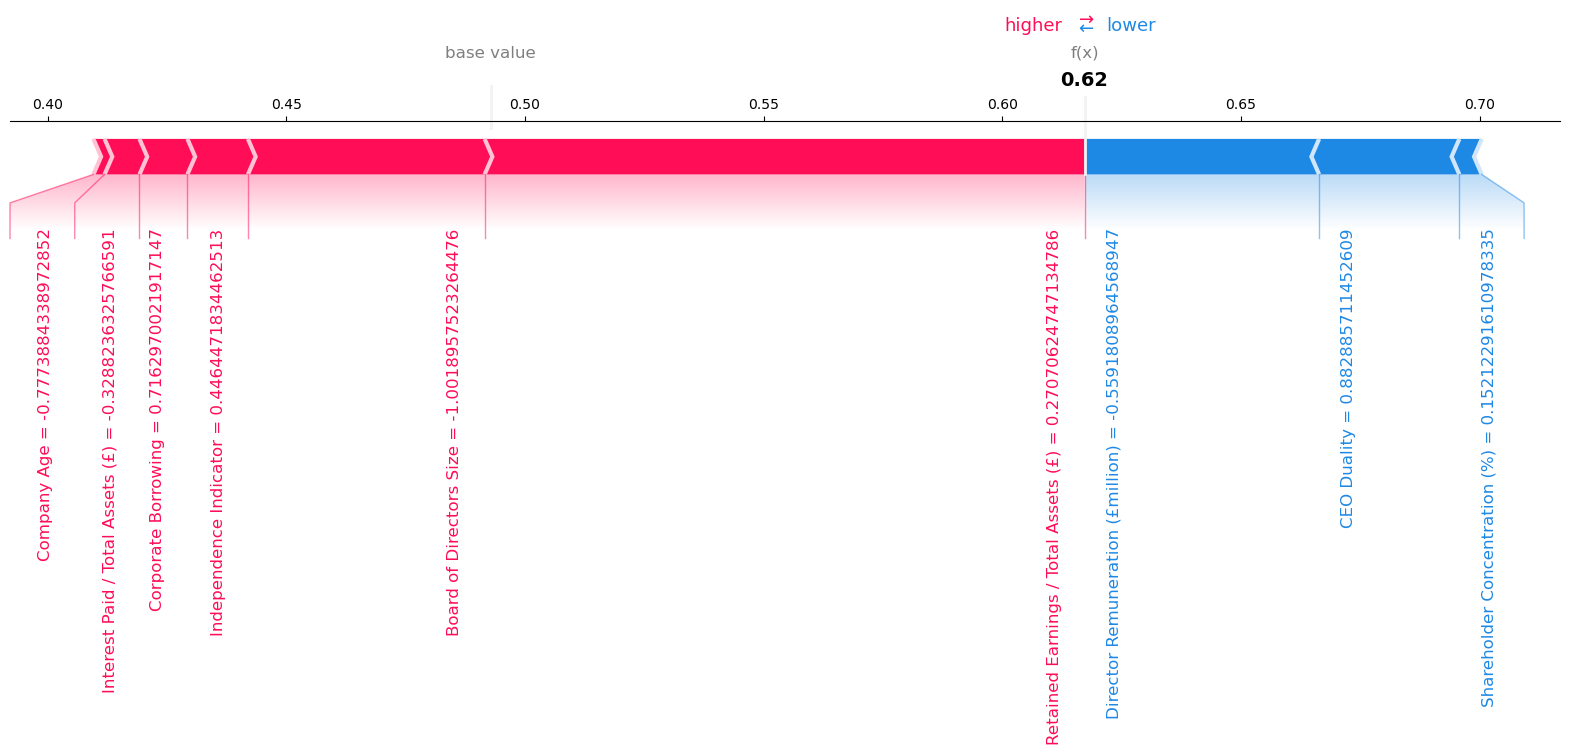

In [55]:
#create a lambda function rturning probabilities
model_fn = lambda x: best_model_ann.predict_proba(x)

#create a background dataset for the explainer
background_data = shap.sample(X_train_scaled, 100)

#initialize the SHAP explainer with the trained model
explainer = shap.KernelExplainer(model_fn, background_data)

#gnerate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

print("SHAP Impact on Model Plot:")

#visualize the SHAP values
feature_names = X_train.columns.tolist()
shap_values_abs = np.abs(shap_values)
shap.summary_plot(shap_values_abs[0],
                  X_test_scaled,
                  feature_names=feature_names,
                  plot_type="violin",
                  plot_size=(16,10))

print("SHAP Force Plot:")

#explain the prediction for the selected instance
shap.force_plot(explainer.expected_value[0],
                shap_values[0][0],
                X_test_scaled[0],
                feature_names=feature_names,
                matplotlib=True,
                text_rotation=90,
                contribution_threshold=0.0001)